In [1]:
setwd("../Data")
load("mydrias.RData")
head(mydrias)
dim(mydrias)

,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP
,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,46.2218,3.94455,307,01/01/2004,7.21,15.04,0.781,0.919
2,9378,46.2218,3.94455,307,01/02/2004,6.15,14.89,0.000,0.662
3,9378,46.2218,3.94455,307,01/03/2004,5.08,5.96,0.000,0.483
4,9378,46.2218,3.94455,307,01/04/2004,0.08,8.51,0.000,0.407
5,9378,46.2218,3.94455,307,01/05/2004,1.39,8.90,0.000,0.948
6,9378,46.2218,3.94455,307,01/06/2004,1.05,10.28,0.000,0.296


[1] 181902      9

In [2]:
str(mydrias)

'data.frame':	181902 obs. of  9 variables:
 $ idpt: int  9378 9378 9378 9378 9378 9378 9378 9378 9378 9378 ...
 $ lat : num  46.2 46.2 46.2 46.2 46.2 ...
 $ lon : num  3.94 3.94 3.94 3.94 3.94 ...
 $ alti: int  307 307 307 307 307 307 307 307 307 307 ...
 $ date: chr  "01/01/2004" "01/02/2004" "01/03/2004" "01/04/2004" ...
 $ Tn  : num  7.21 6.15 5.08 0.08 1.39 1.05 3.71 5.4 2.72 0.93 ...
 $ Tx  : num  15.04 14.89 5.96 8.51 8.9 ...
 $ RR  : num  0.781 0 0 0 0 ...
 $ ETP : num  0.919 0.662 0.483 0.407 0.948 0.296 0.388 0.308 0.266 0.625 ...


In [3]:
## ajout des jours juliens au dataframe mydrias qui contient les données climat
## attention ici de bien vérifier comment vos dates sont organisées
mydrias$date <- as.Date(mydrias$date,"%m/%d/%Y")
mydrias$doi <- as.integer(format(mydrias$date,"%j"))

In [4]:
tail(mydrias)
str(mydrias)

,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP,doi
,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
181897,13520,48.3146,3.46945,169,2004-12-26,5.34,10.58,0.000,0.390,361
181898,13520,48.3146,3.46945,169,2004-12-27,3.94,10.28,3.640,0.357,362
181899,13520,48.3146,3.46945,169,2004-12-28,5.15,5.92,0.974,0.359,363
181900,13520,48.3146,3.46945,169,2004-12-29,2.48,8.95,0.565,0.477,364
181901,13520,48.3146,3.46945,169,2004-12-30,4.57,7.11,0.283,0.278,365
181902,13520,48.3146,3.46945,169,2004-12-31,4.21,8.82,0.000,0.517,366


'data.frame':	181902 obs. of  10 variables:
 $ idpt: int  9378 9378 9378 9378 9378 9378 9378 9378 9378 9378 ...
 $ lat : num  46.2 46.2 46.2 46.2 46.2 ...
 $ lon : num  3.94 3.94 3.94 3.94 3.94 ...
 $ alti: int  307 307 307 307 307 307 307 307 307 307 ...
 $ date: Date, format: "2004-01-01" "2004-01-02" ...
 $ Tn  : num  7.21 6.15 5.08 0.08 1.39 1.05 3.71 5.4 2.72 0.93 ...
 $ Tx  : num  15.04 14.89 5.96 8.51 8.9 ...
 $ RR  : num  0.781 0 0 0 0 ...
 $ ETP : num  0.919 0.662 0.483 0.407 0.948 0.296 0.388 0.308 0.266 0.625 ...
 $ doi : int  1 2 3 4 5 6 7 8 9 10 ...


In [5]:
### Pour eviter d'avoir à chaque fois à lancer les lignes précendentes
### nous allons sauvegarder l'objet mydrias dand le format des fichiers R
save(mydrias, file = "mydrias.RData")

In [7]:
## Vérification que Tx > Tn
indn <- which(mydrias$Tn>mydrias$Tx)
length(mydrias$Tx[indn])
## si length(mydrias$Tx[indn]) > 0 donc il y a des jours pour lesquels
## Tn > Tx ce qui est bien évidemment un problème et pose question
## A votre avis à quoi cela peut-il être du ?

[1] 0

In [8]:
## Charge la fonction de calcul de l'ETP Hargreaves
source("../FonctionsR/ETPHargreaves.R")

In [9]:
ls() ## liste des objets chargés dans 

[1] "etht"    "etmh"    "indn"    "mydrias"

In [10]:
etht ## détail sur la fonction de calcul de l'ETP
## La fonction etht calcule l'ETP au pas de temps journalier
## les arguments de la fonction sont : tn, tx, latitude en degré décimal et jour de l'année
## Nous utiliserons ici la fonction de R mapply qui permet d'appliquer itérativement une fontion
## nécessitant plusieurs argument. Cette fonction évite donc l'utilisation de boucle for moins efficace 
## en particulier pour des gros dataframes

function (tn, tx, latdeg, doy, a = 0.0023) 
{
    lat = latdeg * pi/180
    gsc = 0.082
    t_m = (tn + tx)/2
    d_r = 1 + 0.033 * cos(2 * pi * doy/365)
    del = 0.409 * sin(2 * pi * doy/365 - 1.39)
    om = acos(-tan(lat) * tan(del))
    om[is.nan(om)] <- c(pi - 10^-9, 10^-9)[((latdeg[is.nan(om)] * 
        del) < 0) + 1]
    Ga = ((24 * 60)/pi) * gsc * d_r * (om * sin(lat) * sin(del) + 
        cos(lat) * cos(del) * sin(om))
    Ga[Ga < 0] <- 0
    et0 = a * Ga/2.45 * (t_m + 17.8) * sqrt(tx - tn)
    et0 = pmax(et0, 0)
    return(et0)
}

In [36]:
## Teste la fonction pour le premier jour
etht(tn = mydrias$Tn[1], tx = mydrias$Tx[1],latdeg = mydrias$lat[1],
     doy = mydrias$doi[1]) # test sur la 1ere valeur

head(mydrias)

[1] 0.7602569

,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP,doi
,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,9378,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,1
2,9378,46.2218,3.94455,307,2004-01-02,6.15,14.89,0.000,0.662,2
3,9378,46.2218,3.94455,307,2004-01-03,5.08,5.96,0.000,0.483,3
4,9378,46.2218,3.94455,307,2004-01-04,0.08,8.51,0.000,0.407,4
5,9378,46.2218,3.94455,307,2004-01-05,1.39,8.90,0.000,0.948,5
6,9378,46.2218,3.94455,307,2004-01-06,1.05,10.28,0.000,0.296,6


In [11]:
## utilisation de la fonction suppressWarnings afin d'éviter l'affichage des messages d'alerte

ETP0 <- mapply(etht, tn=mydrias$Tn, tx=mydrias$Tx, 
                                latdeg=mydrias$lat, doy=mydrias$doi)

In [12]:
## check des résultats vérification de présence de NaN
## NaN problème dans le calcul lié au fait que pour certains jours
## tn > tx
length(which(is.nan(ETP0)))

[1] 0

In [38]:
## si présence de NaN -> remplace NaN par des NA
ETP0[is.nan(ETP0)] <- NA

In [39]:
## Charge la librairie zoo afin d'utiliser la fonction na.approx pour remplacer
## les NAs par une valeur approximée par une méthode d'interpolation linéaire
#library(zoo)
## Remplacement des NAs par interpolation linéaire
#ETP0 <- na.approx(ETP0)
#length(which(is.nan(ETP0)))
#length(ETP0)

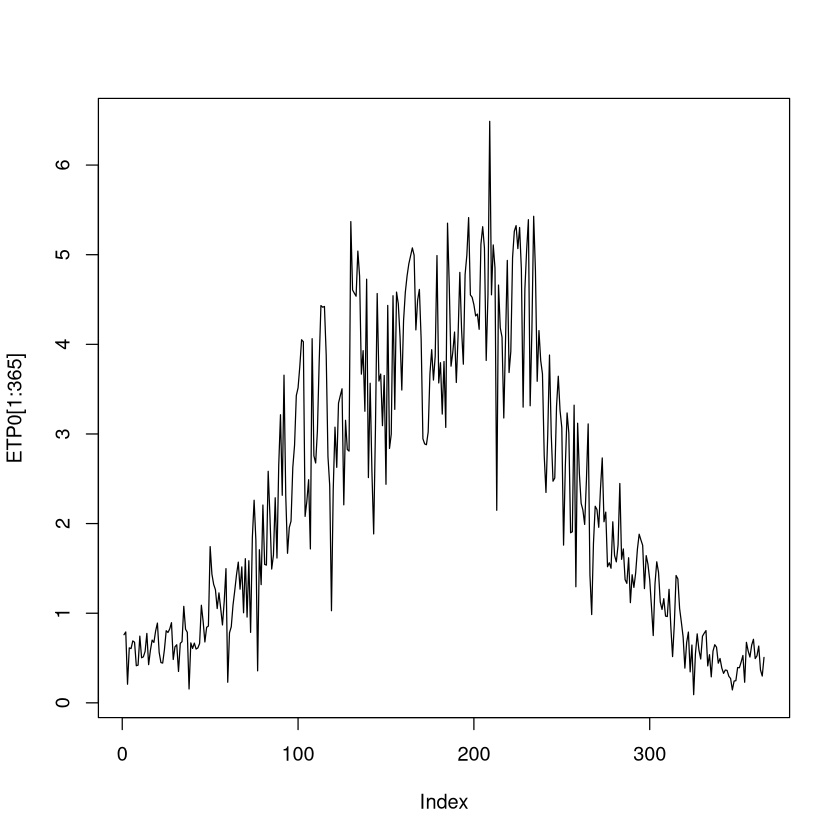

In [40]:
## Vérification des résultats. Trace les valeurs d'ETP pour les 365 premiers jours
## Cela vous parait-il cohérent ?
plot(ETP0[1:365],type="l")

In [41]:
ls()

[1] "etht"    "etmh"    "ETP0"    "indn"    "Kc"      "mydrias"

In [13]:
#### Ajout de l'ETP au dataframe mydrias
mydrias$ETP0 <- ETP0

,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP,doi,ETP0
,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,9378,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,1,0.7602569
2,9378,46.2218,3.94455,307,2004-01-02,6.15,14.89,0.000,0.662,2,0.7907394
3,9378,46.2218,3.94455,307,2004-01-03,5.08,5.96,0.000,0.483,3,0.2078320
4,9378,46.2218,3.94455,307,2004-01-04,0.08,8.51,0.000,0.407,4,0.6133170
5,9378,46.2218,3.94455,307,2004-01-05,1.39,8.90,0.000,0.948,5,0.6051917
6,9378,46.2218,3.94455,307,2004-01-06,1.05,10.28,0.000,0.296,6,0.6910082


[1] 0.9674449

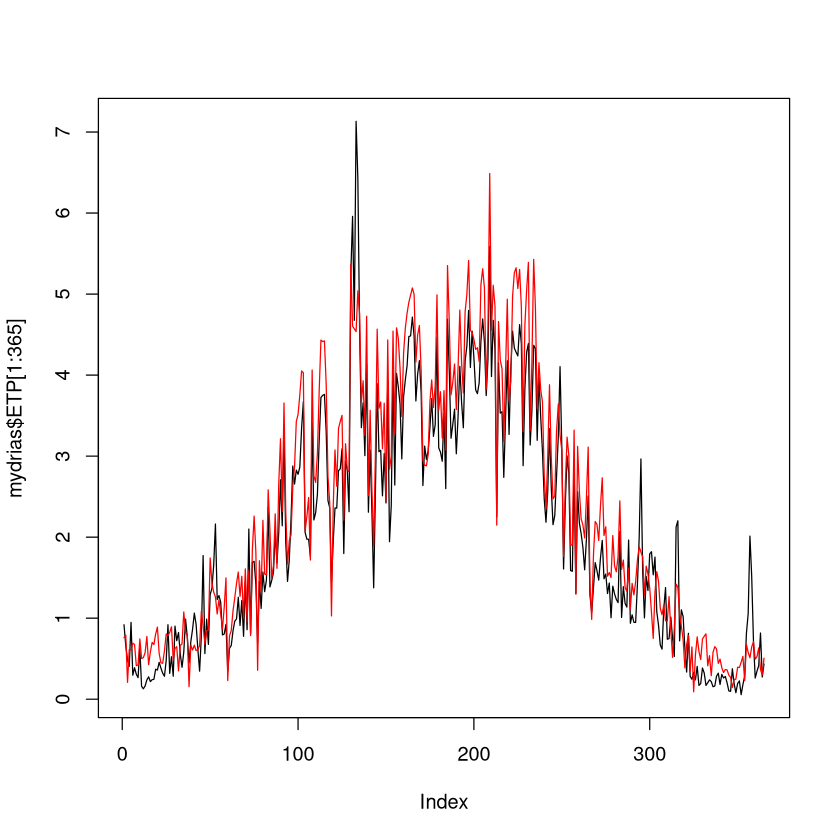

In [14]:
head(mydrias)
plot(mydrias$ETP[1:365],type="l")
lines(mydrias$ETP0[1:365], col="red")
cor(mydrias$ETP[1:365],mydrias$ETP0[1:365])

In [15]:
########################################################################
## Récupération des données de Kc (cf. script kcjj.R))
####################################################################
load("Kc.RData")

In [16]:
ls()

[1] "etht"    "etmh"    "ETP0"    "indn"    "Kc"      "mydrias"

In [17]:
## jointure des données de kc aux données drias
## on utilise ici le doi (jour de l'année) comme
## clef de jointure afin d'attribuer le bon Kc au bon jour
mydrias <- merge(mydrias, Kc, by.x = "doi", by.y = "doi")

In [18]:
head(mydrias)

,doi,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP,ETP0,kcc,kcl,kcs
,<int>,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,9378,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,0.7602569,0.2,0.2,0.2
2,1,11386,47.2185,4.60839,407,2004-01-01,9.75,13.79,0.231,1.174,0.5245913,0.2,0.2,0.2
3,1,13234,48.1708,3.46635,148,2004-01-01,9.62,11.58,7.017,0.228,0.3295486,0.2,0.2,0.2
4,1,11387,47.2163,4.71396,458,2004-01-01,8.61,11.65,0.323,0.795,0.4298809,0.2,0.2,0.2
5,1,13235,48.1697,3.57387,204,2004-01-01,9.69,10.80,7.908,0.216,0.2449190,0.2,0.2,0.2
6,1,9381,46.2170,4.25553,362,2004-01-01,8.32,14.83,0.250,1.336,0.7042082,0.2,0.2,0.2


In [19]:
## Calcul de l'ETM = ETP x Kc
mydrias$ETM <- mydrias$ETP * mydrias$kcl
mydrias$ETM0 <- mydrias$ETP0 * mydrias$kcl

In [22]:
head(mydrias)

,doi,idpt,lat,lon,alti,date,Tn,Tx,RR,ETP,ETP0,kcc,kcl,kcs,ETM,ETM0
,<int>,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,9378,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,0.7602569,0.2,0.2,0.2,0.1838,0.15205138
2,1,11386,47.2185,4.60839,407,2004-01-01,9.75,13.79,0.231,1.174,0.5245913,0.2,0.2,0.2,0.2348,0.10491825
3,1,13234,48.1708,3.46635,148,2004-01-01,9.62,11.58,7.017,0.228,0.3295486,0.2,0.2,0.2,0.0456,0.06590971
4,1,11387,47.2163,4.71396,458,2004-01-01,8.61,11.65,0.323,0.795,0.4298809,0.2,0.2,0.2,0.1590,0.08597617
5,1,13235,48.1697,3.57387,204,2004-01-01,9.69,10.80,7.908,0.216,0.2449190,0.2,0.2,0.2,0.0432,0.04898379
6,1,9381,46.2170,4.25553,362,2004-01-01,8.32,14.83,0.250,1.336,0.7042082,0.2,0.2,0.2,0.2672,0.14084164


In [20]:
## Sauvegarde de mydrias 
save(mydrias,file="mydrias.RData")
## A ce stade il ne reste plus qu'à récupérer la taille du réservoir i.e.RU
## La RU a été calculé pour chaque point de grille avec QGIS

In [21]:
######################################################################
## Récupération des données de RU pour chaque point (cf. traitement QGIS)
## lecture du shapefile contenant les valeur de RU par point de grille
## Nous allons utiliser le package maptools de R qui permet de lire 
## des données spatiales issues d'un SIG comme QGIS
######################################################################
#library(maptools)
library(sf)


Linking to GEOS 3.13.0, GDAL 3.9.3, PROJ 9.4.1; sf_use_s2() is TRUE



In [22]:
#ptdriasRU <- readShapePoly('RU_ptdrias.shp')
ptdriasRU <- st_read('points_drias_RU.shp')
#str(ptdriasRU)
#dir()

Reading layer `points_drias_RU' from data source 
  `/home/thierry/works/wdM2/UE4/UE4_Climat_2024/Data/points_drias_RU.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 497 features and 11 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 689891.1 ymin: 6564997 xmax: 890000.6 ymax: 6805965
Projected CRS: RGF93 v1 / Lambert-93


In [23]:
## Récupération des données de la table contenat les valeur de RU 
## ainsique les identifiants des points de grille
RU <- as.data.frame(ptdriasRU)
## Sélection de l'identifiant, de la valeur moyenne et de la valeur majoritaire
## faite une head(RU) pour mettre les bons noms des colonnes)
#RU <- RU[,c("idpt","zstru_mean","zstru_medi", "zstru_majo")]
head(RU)
RU <- RU[,-ncol(RU)] ## supprime la dernière colonne
head(RU)

,idpt,lon,lat,alti,X_mean,X_median,X_stdev,X_min,X_max,X_majority,Dif_median,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POLYGON [m]>
1,9378,3.94455,46.2218,307,103.82236,106,9.086075,74,128,106,-2.178,"POLYGON ((768805.1 6565540,..."
2,9379,4.04821,46.2203,298,100.71042,106,25.112361,21,128,106,-5.290,"POLYGON ((776796.9 6565475,..."
3,9380,4.15188,46.2187,388,90.74173,83,23.689463,21,122,83,7.742,"POLYGON ((784790 6565408, 7..."
4,9381,4.25553,46.2170,362,77.10693,74,23.197344,21,122,71,3.107,"POLYGON ((792781.9 6565341,..."
5,9382,4.35918,46.2151,489,72.41348,71,14.558601,0,82,71,1.413,"POLYGON ((800774.6 6565263,..."
6,9386,4.77370,46.2070,192,95.75193,67,59.568974,44,188,44,28.752,"POLYGON ((832744 6564997, 8..."


,idpt,lon,lat,alti,X_mean,X_median,X_stdev,X_min,X_max,X_majority,Dif_median
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,3.94455,46.2218,307,103.82236,106,9.086075,74,128,106,-2.178
2,9379,4.04821,46.2203,298,100.71042,106,25.112361,21,128,106,-5.290
3,9380,4.15188,46.2187,388,90.74173,83,23.689463,21,122,83,7.742
4,9381,4.25553,46.2170,362,77.10693,74,23.197344,21,122,71,3.107
5,9382,4.35918,46.2151,489,72.41348,71,14.558601,0,82,71,1.413
6,9386,4.77370,46.2070,192,95.75193,67,59.568974,44,188,44,28.752


In [24]:
## Jointure des données de RU à mydrias
mydrias <- merge(mydrias, RU, by.x = "idpt", by.y = "idpt")

In [50]:
str(mydrias)

'data.frame':	181902 obs. of  22 variables:
 $ idpt      : int  9378 9378 9378 9378 9378 9378 9378 9378 9378 9378 ...
 $ lat.x     : num  46.2 46.2 46.2 46.2 46.2 ...
 $ lon.x     : num  3.94 3.94 3.94 3.94 3.94 ...
 $ alti.x    : int  307 307 307 307 307 307 307 307 307 307 ...
 $ date      : Date, format: "2004-01-01" "2004-01-02" ...
 $ Tn        : num  7.21 6.15 5.08 0.08 1.39 1.05 3.71 5.4 2.72 0.93 ...
 $ Tx        : num  15.04 14.89 5.96 8.51 8.9 ...
 $ RR        : num  0.781 0 0 0 0 ...
 $ ETP       : num  0.919 0.662 0.483 0.407 0.948 0.296 0.388 0.308 0.266 0.625 ...
 $ doi       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ETP0      : num  0.76 0.791 0.208 0.613 0.605 ...
 $ lon.y     : num  3.94 3.94 3.94 3.94 3.94 ...
 $ lat.y     : num  46.2 46.2 46.2 46.2 46.2 ...
 $ alti.y    : num  307 307 307 307 307 307 307 307 307 307 ...
 $ X_mean    : num  104 104 104 104 104 ...
 $ X_median  : num  106 106 106 106 106 106 106 106 106 106 ...
 $ X_stdev   : num  9.09 9.09 9.09 9.09 9.09 ...

In [25]:
mydrias <- mydrias[order(mydrias$idpt, mydrias$date),]
str(mydrias)

'data.frame':	181902 obs. of  26 variables:
 $ idpt      : int  9378 9378 9378 9378 9378 9378 9378 9378 9378 9378 ...
 $ doi       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ lat.x     : num  46.2 46.2 46.2 46.2 46.2 ...
 $ lon.x     : num  3.94 3.94 3.94 3.94 3.94 ...
 $ alti.x    : int  307 307 307 307 307 307 307 307 307 307 ...
 $ date      : Date, format: "2004-01-01" "2004-01-02" ...
 $ Tn        : num  7.21 6.15 5.08 0.08 1.39 1.05 3.71 5.4 2.72 0.93 ...
 $ Tx        : num  15.04 14.89 5.96 8.51 8.9 ...
 $ RR        : num  0.781 0 0 0 0 ...
 $ ETP       : num  0.919 0.662 0.483 0.407 0.948 0.296 0.388 0.308 0.266 0.625 ...
 $ ETP0      : num  0.76 0.791 0.208 0.613 0.605 ...
 $ kcc       : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ kcl       : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ kcs       : num  0.2 0.2 0.2 0.2 0.2 ...
 $ ETM       : num  0.1838 0.1324 0.0966 0.0814 0.1896 ...
 $ ETM0      : num  0.1521 0.1581 0.0416 0.1227 0.121 ...
 $ lon.y     : num  3.94 3.94

In [26]:
## Sauvegarde de mydrias complet i.e. avec l'ensemble des données nécessaires
## pour faire le calcul du bilan hydrique au pas de temps journalier
save(mydrias,file="mydrias.RData")

In [55]:
dim(mydrias)

[1] 181902     23

In [56]:
head(mydrias)

,idpt,doi,lat.x,lon.x,alti.x,date,Tn,Tx,RR,ETP,⋯,kcs,ETM,ETM0,lon.y,lat.y,alti.y,RUmean,RUmedian,RUstdev,RUmajority
,<int>,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,1,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,⋯,0.2000000,0.1838,0.1520514,3.94455,46.2218,307,103.8224,106,9.086075,106
2,9378,2,46.2218,3.94455,307,2004-01-02,6.15,14.89,0.000,0.662,⋯,0.1999332,0.1324,0.1581479,3.94455,46.2218,307,103.8224,106,9.086075,106
3,9378,3,46.2218,3.94455,307,2004-01-03,5.08,5.96,0.000,0.483,⋯,0.1998767,0.0966,0.0415664,3.94455,46.2218,307,103.8224,106,9.086075,106
4,9378,4,46.2218,3.94455,307,2004-01-04,0.08,8.51,0.000,0.407,⋯,0.1998305,0.0814,0.1226634,3.94455,46.2218,307,103.8224,106,9.086075,106
5,9378,5,46.2218,3.94455,307,2004-01-05,1.39,8.90,0.000,0.948,⋯,0.1997945,0.1896,0.1210383,3.94455,46.2218,307,103.8224,106,9.086075,106
6,9378,6,46.2218,3.94455,307,2004-01-06,1.05,10.28,0.000,0.296,⋯,0.1997688,0.0592,0.1382016,3.94455,46.2218,307,103.8224,106,9.086075,106
